<a href="https://colab.research.google.com/github/SilverFoxMedia-Tesis/IA_02/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# muestra el gráfico en el cuaderno (no utiliza una ventana)
%matplotlib inline

In [4]:
datos = pd.read_csv("train_last_modified.csv")
datos.head(10)

,Gender,Age,Diabetes,Weight,Height,AbdominalCircumference,PhysicalActivity,TMB,ClassificationIMC,Deficit,PesoAperder,Carbohidratos_G,Proteinas_G,Grasas_G
0,MALE,39,NO,75.0,171.0,95.6,No,1749.00,Overweight,1399.20,1.50,174.90,69.96,46.64
1,FEMALE,22,NO,65.9,158.1,89.5,Slight,2027.48,Overweight,1621.98,1.32,202.75,81.10,54.07
2,FEMALE,20,NO,58.3,161.5,82.9,Slight,1949.09,Normal_Weight,1559.27,1.17,194.91,77.96,51.98
3,MALE,33,NO,73.8,170.7,93.7,No,1735.08,Overweight,1388.06,1.48,173.51,69.40,46.27
4,FEMALE,38,NO,53.9,151.5,74.9,No,1297.93,Normal_Weight,1038.34,1.08,129.79,51.92,34.61
5,MALE,35,NO,90.3,176.1,103.2,No,1926.48,Overweight,1541.18,1.81,192.65,77.06,51.37
6,FEMALE,26,NO,62.4,156.1,84.5,Moderate,2198.91,Overweight,1759.13,1.25,219.89,87.96,58.64
7,FEMALE,24,NO,68.3,155.7,89.2,Moderate,2299.69,Overweight,1839.75,1.37,229.97,91.99,61.32
8,MALE,34,NO,81.5,169.0,98.0,No,1824.40,Overweight,1459.52,1.63,182.44,72.98,48.65
9,MALE,34,NO,52.9,164.6,71.5,Slight,1906.92,Normal_Weight,1525.54,1.06,190.69,76.28,50.85


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29397 entries, 0 to 29396
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  29397 non-null  object 
 1   Age                     29397 non-null  int64  
 2   Diabetes                29397 non-null  object 
 3   Weight                  29397 non-null  float64
 4   Height                  29397 non-null  float64
 5   AbdominalCircumference  29397 non-null  float64
 6   PhysicalActivity        29397 non-null  object 
 7   TMB                     29397 non-null  float64
 8   ClassificationIMC       29397 non-null  object 
 9   Deficit                 29397 non-null  float64
 10  PesoAperder             29397 non-null  float64
 11  Carbohidratos_G         29397 non-null  float64
 12  Proteinas_G             29397 non-null  float64
 13  Grasas_G                29397 non-null  float64
dtypes: float64(9), int64(1), object(4)
mem

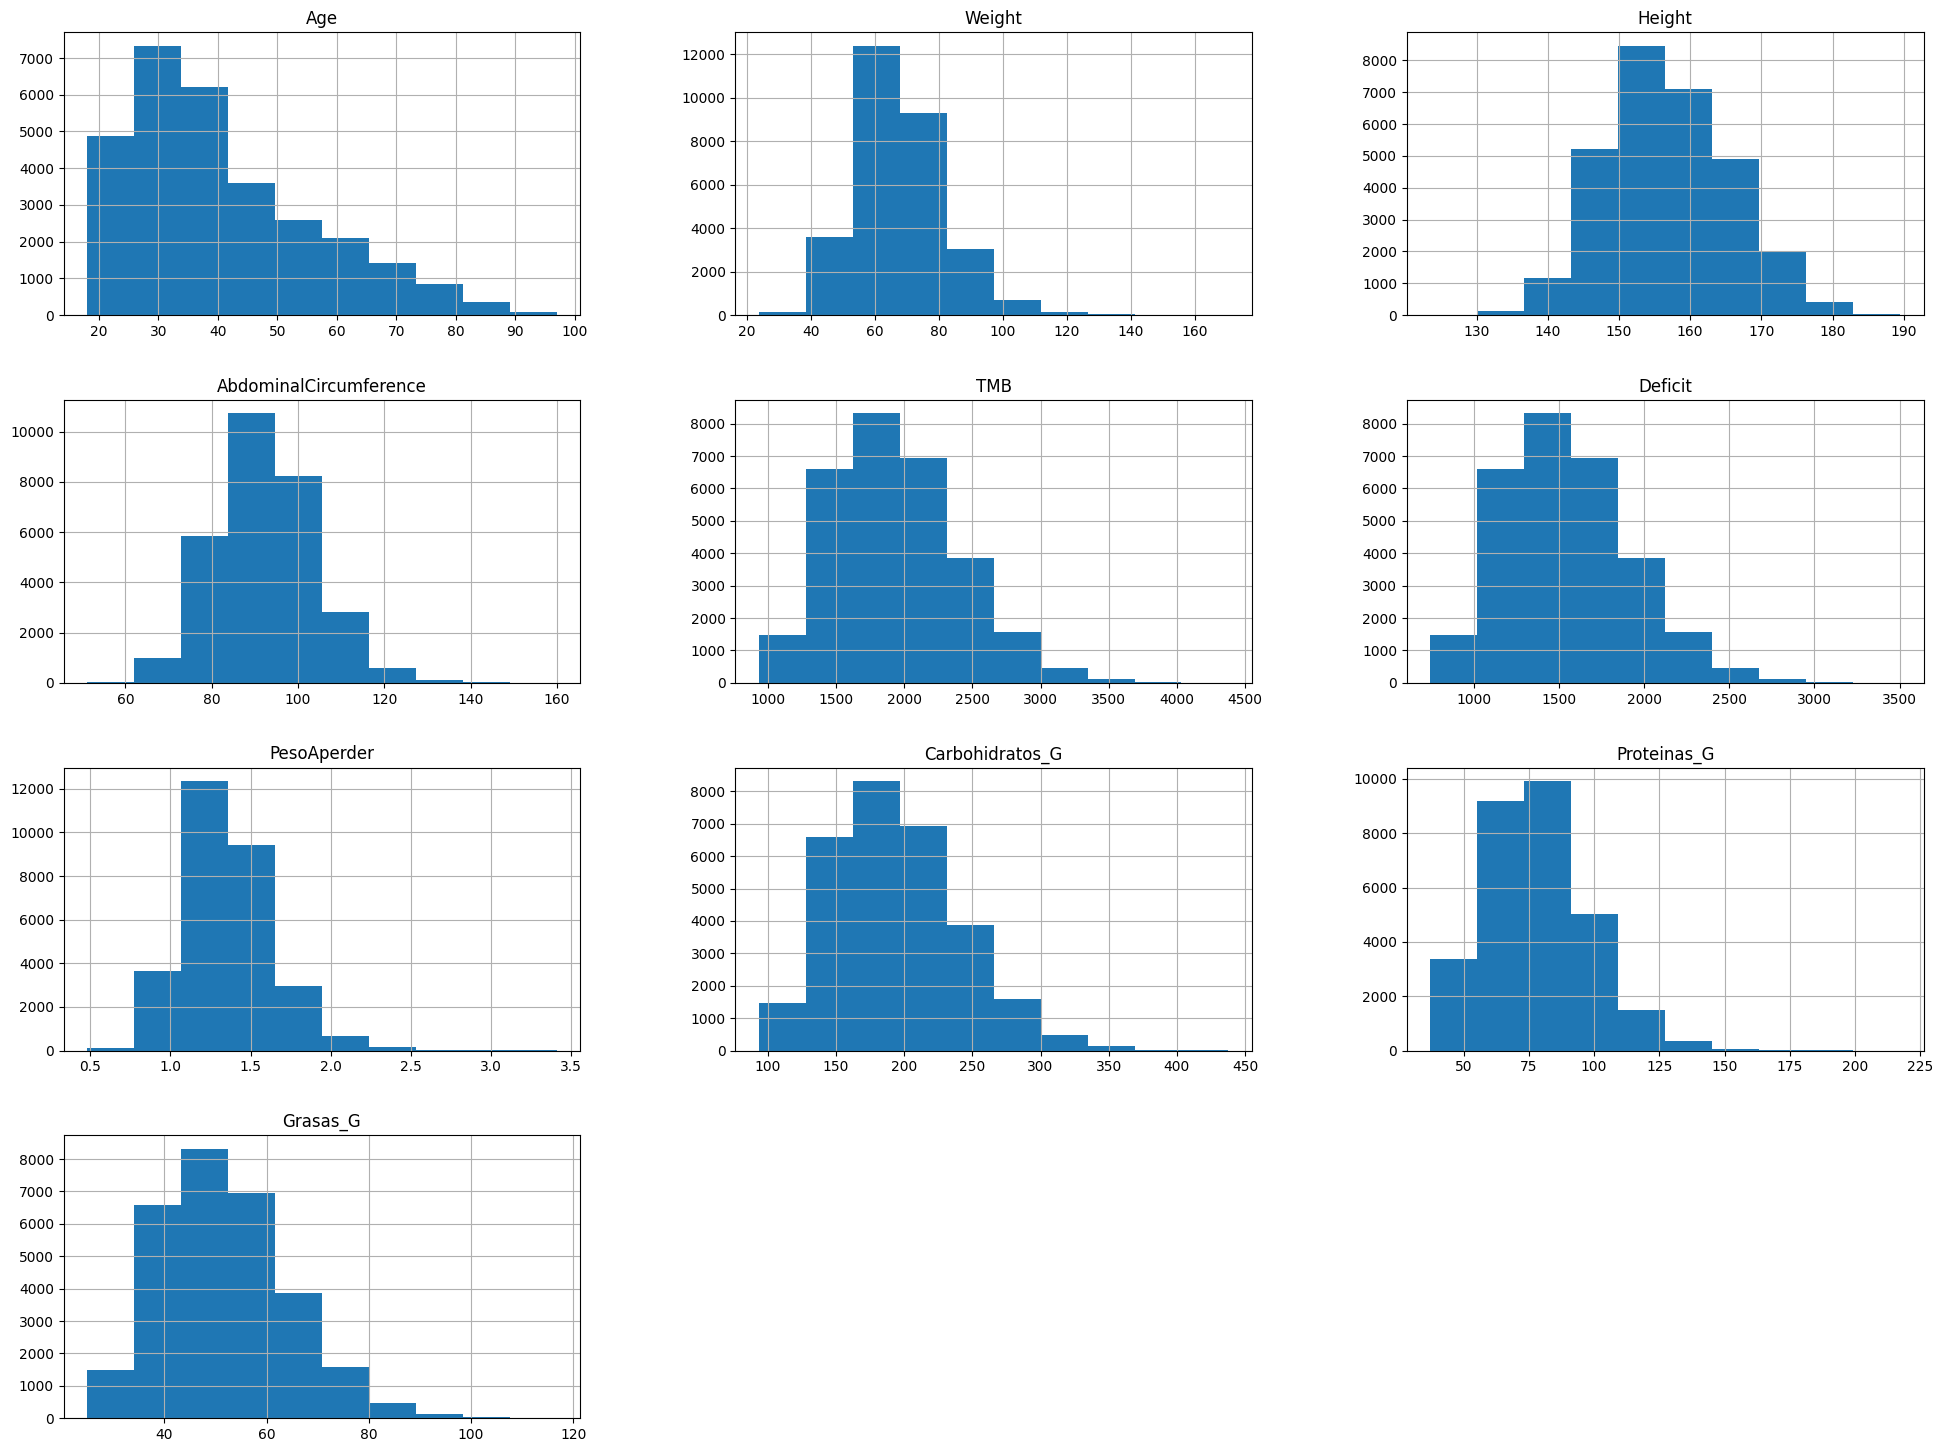

In [6]:
datos.hist(figsize=(24,18))
plt.show()

In [7]:
datos.columns

Index(['Gender', 'Age', 'Diabetes', 'Weight', 'Height',
       'AbdominalCircumference', 'PhysicalActivity', 'TMB',
       'ClassificationIMC', 'Deficit', 'PesoAperder', 'Carbohidratos_G',
       'Proteinas_G', 'Grasas_G'],
      dtype='object')

In [9]:
datos.groupby('Gender').size()

Gender
FEMALE    16628
MALE      12769
dtype: int64

In [10]:
datos.groupby('PhysicalActivity').size()

PhysicalActivity
Moderate        5114
No             10634
Slight         10419
Strong          2393
Very_Strong      837
dtype: int64

In [8]:
datos.groupby('ClassificationIMC').size()

ClassificationIMC
Insufficient_Weight      287
Normal_Weight           9138
Obesity_Type_I          5886
Obesity_Type_II         1504
Obesity_Type_III         474
Overweight             12108
dtype: int64

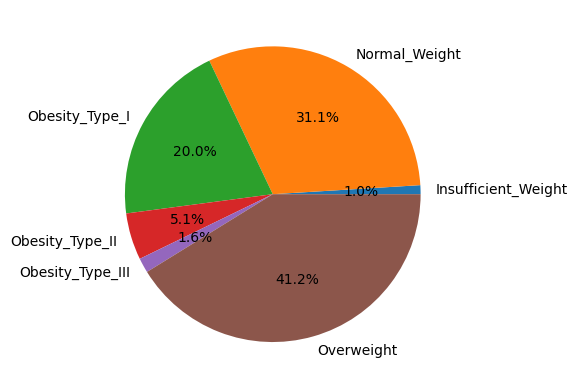

In [14]:
data = datos.groupby('ClassificationIMC').size()

# Ahora creamos el gráfico circular con porcentajes
plt.pie(data, labels=data.index, autopct='%1.1f%%')  # %1.1f%% es el formato para mostrar un decimal en los porcentajes
plt.show()

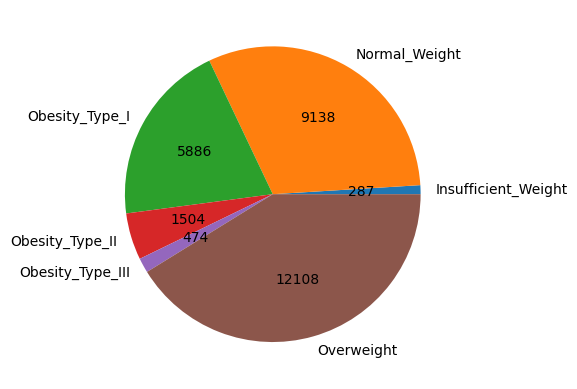

In [15]:
data = datos.groupby('ClassificationIMC').size()

# Definimos una función para calcular las cantidades absolutas y mostrarlas en el gráfico
def absolute_value(val):
    a  = np.round(val/100.*data.sum(), 0)
    return int(a)

# Creamos el gráfico circular con cantidades absolutas
plt.pie(data, labels=data.index, autopct=absolute_value)
plt.show()

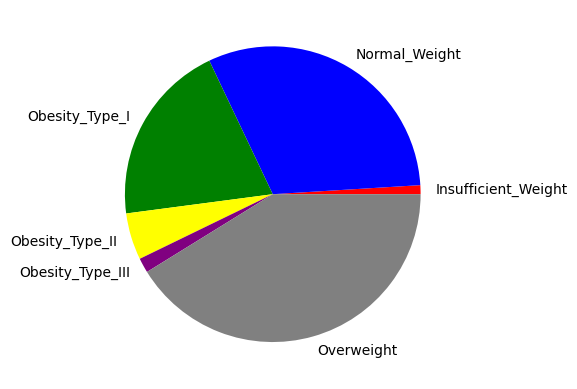

In [17]:
categorias = set(datos.ClassificationIMC)
color = {
    'Insufficient_Weight': 'red',     # Sustituye 'Categoria1' con el nombre real de tu categoría
    'Normal_Weight': 'blue',    # y así sucesivamente para cada categoría real que tienes
    'Obesity_Type_I': 'green',
    'Obesity_Type_II': 'yellow',
    'Obesity_Type_III': 'purple',
    'Overweight': 'gray'
}

# Mapeamos los colores a la columna 'ClassificationIMC'
datos_color = datos.ClassificationIMC.map(color)

# Ahora creamos un gráfico circular
data = datos.groupby('ClassificationIMC').size()
plt.pie(data, labels=data.index, colors=[color[key] for key in data.index])
plt.show()

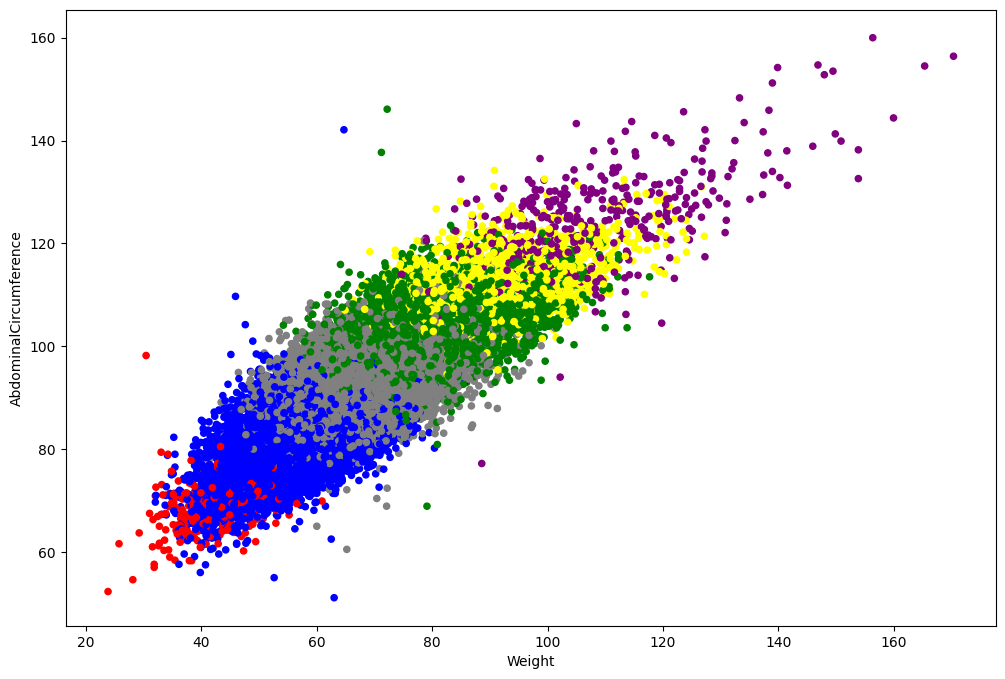

In [33]:
datos.plot("Weight", "AbdominalCircumference", kind="scatter", color=datos_color,figsize=(12,8))
plt.show()

In [34]:
datos.head(1)

,Gender,Age,Diabetes,Weight,Height,AbdominalCircumference,PhysicalActivity,TMB,ClassificationIMC,Deficit,PesoAperder,Carbohidratos_G,Proteinas_G,Grasas_G
0,MALE,39,NO,75.0,171.0,95.6,No,1749.0,Overweight,1399.2,1.5,174.9,69.96,46.64


In [35]:
import plotly.express as px
fig = px.scatter_3d(datos, x='Age', y='Weight', z='AbdominalCircumference', color='ClassificationIMC')
fig.update_traces(marker_size = 4)
fig.show()

In [ ]:
datos.describe()

In [41]:
datos
# Filtro con pandas

#varones = datos["sex" == 1]


varones = datos[datos.Gender == 'MALE']
mujeres = datos[datos.Gender == 'FEMALE']


In [46]:
datos
Insufficient_Weight = datos[datos.ClassificationIMC == 'Insufficient_Weight']
Normal_Weight = datos[datos.ClassificationIMC == 'Normal_Weight']
Obesity_Type_I = datos[datos.ClassificationIMC == 'Obesity_Type_I']
Obesity_Type_II = datos[datos.ClassificationIMC == 'Obesity_Type_II']
Obesity_Type_III = datos[datos.ClassificationIMC == 'Obesity_Type_III']
Overweight = datos[datos.ClassificationIMC == 'Overweight']


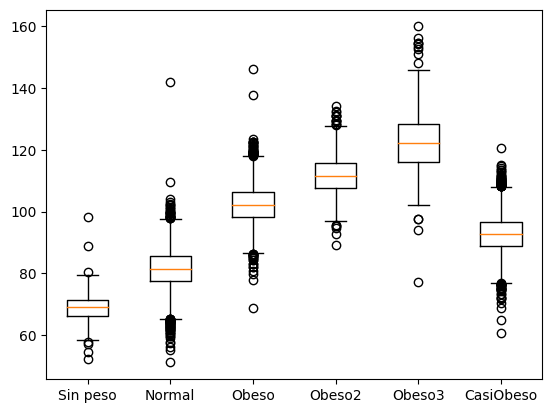

In [48]:
plt.boxplot([Insufficient_Weight.AbdominalCircumference, Normal_Weight.AbdominalCircumference, Obesity_Type_I.AbdominalCircumference, Obesity_Type_II.AbdominalCircumference, Obesity_Type_III.AbdominalCircumference, Overweight.AbdominalCircumference], labels=['Sin peso','Normal','Obeso','Obeso2','Obeso3','CasiObeso'])
plt.show()

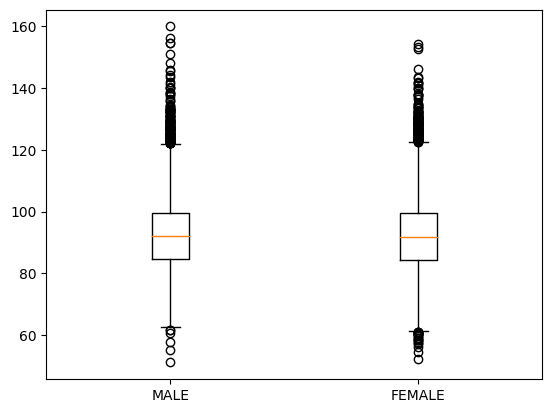

In [43]:
plt.boxplot([varones.AbdominalCircumference, mujeres.AbdominalCircumference], labels=['MALE','FEMALE'])
plt.show()

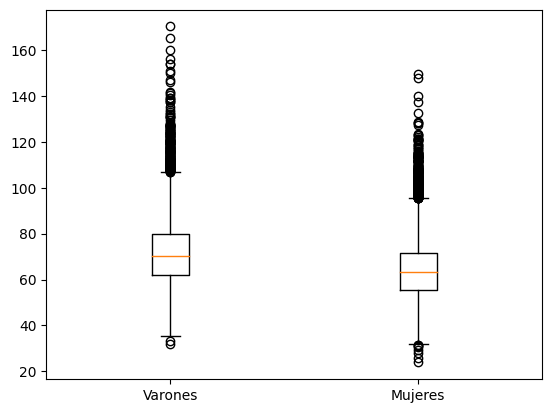

In [45]:
plt.boxplot([varones.Weight, mujeres.Weight], labels=['Varones','Mujeres'])
plt.show()

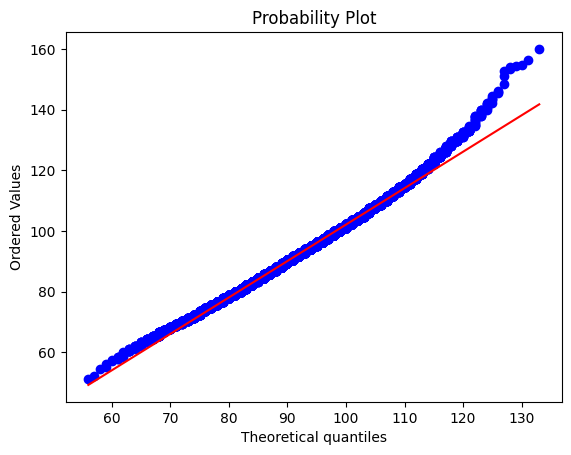

In [51]:
import statistics
import pylab
import scipy.stats as stats

stats.probplot(datos['AbdominalCircumference'],dist=stats.poisson(statistics.median(datos['AbdominalCircumference'])), plot=pylab)
pylab.show()

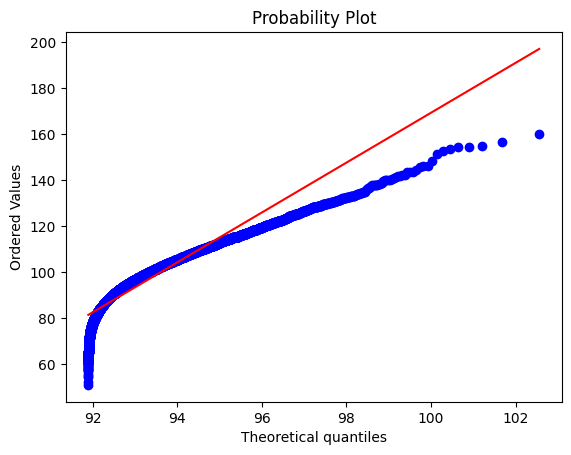

In [52]:
import statistics
import pylab
import scipy.stats as stats

stats.probplot(datos['AbdominalCircumference'],dist=stats.expon(statistics.median(datos['AbdominalCircumference'])), plot=pylab)
pylab.show()

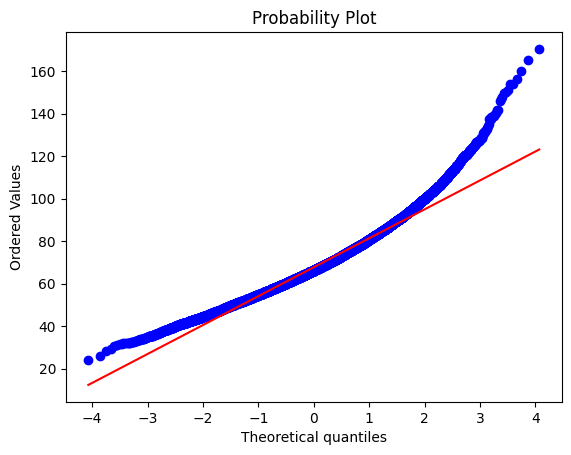

In [54]:
import pylab
import scipy.stats as stats

stats.probplot(datos['Weight'],dist=stats.norm, plot=pylab)
pylab.show()

In [59]:
datos2 = pd.read_csv("/modified_train_data_2.csv")
datos2.head(10)

,Gender,Age,Diabetes,Weight,Height,AbdominalCircumference,PhysicalActivity,TMB,ClassificationIMC,Deficit,PesoAperder,Carbohidratos_G,Proteinas_G,Grasas_G
0,1,39,2.0,75.0,171.0,95.6,1,1749.00,3,1399.20,1.50,174.90,69.96,46.64
1,2,22,2.0,65.9,158.1,89.5,2,2027.48,3,1621.98,1.32,202.75,81.10,54.07
2,2,20,2.0,58.3,161.5,82.9,2,1949.09,2,1559.27,1.17,194.91,77.96,51.98
3,1,33,2.0,73.8,170.7,93.7,1,1735.08,3,1388.06,1.48,173.51,69.40,46.27
4,2,38,2.0,53.9,151.5,74.9,1,1297.93,2,1038.34,1.08,129.79,51.92,34.61
5,1,35,2.0,90.3,176.1,103.2,1,1926.48,3,1541.18,1.81,192.65,77.06,51.37
6,2,26,2.0,62.4,156.1,84.5,3,2198.91,3,1759.13,1.25,219.89,87.96,58.64
7,2,24,2.0,68.3,155.7,89.2,3,2299.69,3,1839.75,1.37,229.97,91.99,61.32
8,1,34,2.0,81.5,169.0,98.0,1,1824.40,3,1459.52,1.63,182.44,72.98,48.65
9,1,34,2.0,52.9,164.6,71.5,2,1906.92,2,1525.54,1.06,190.69,76.28,50.85


In [60]:
# Matriz de correlación
datos_pearson = datos2.corr(method='pearson')
datos_pearson

,Gender,Age,Diabetes,Weight,Height,AbdominalCircumference,PhysicalActivity,TMB,ClassificationIMC,Deficit,PesoAperder,Carbohidratos_G,Proteinas_G,Grasas_G
Gender,1.000000,-0.060595,-0.012557,-0.274454,-0.690648,-0.016068,-0.001569,-0.352710,0.122390,-0.352710,-0.274406,-0.352710,-0.345023,-0.352709
Age,-0.060595,1.000000,-0.186950,-0.048870,-0.201273,0.204597,-0.010548,-0.265398,0.063971,-0.265398,-0.048982,-0.265398,-0.227543,-0.265397
Diabetes,-0.012557,-0.186950,1.000000,-0.061552,0.019369,-0.121229,0.008357,0.027985,-0.081853,0.027985,-0.061510,0.027985,-0.162015,0.027984
Weight,-0.274454,-0.048870,-0.061552,1.000000,0.512802,0.833823,-0.004332,0.523650,0.786091,0.523650,0.999948,0.523649,0.529548,0.523650
Height,-0.690648,-0.201273,0.019369,0.512802,1.000000,0.119232,-0.002091,0.479995,-0.041899,0.479995,0.512804,0.479995,0.469908,0.479993
AbdominalCircumference,-0.016068,0.204597,-0.121229,0.833823,0.119232,1.000000,-0.002258,0.309466,0.850143,0.309466,0.833770,0.309465,0.329102,0.309466
PhysicalActivity,-0.001569,-0.010548,0.008357,-0.004332,-0.002091,-0.002258,1.000000,0.744481,-0.002736,0.744481,-0.004315,0.744481,0.731982,0.744481
TMB,-0.352710,-0.265398,0.027985,0.523650,0.479995,0.309466,0.744481,1.000000,0.276873,1.000000,0.523652,1.000000,0.980786,1.000000
ClassificationIMC,0.122390,0.063971,-0.081853,0.786091,-0.041899,0.850143,-0.002736,0.276873,1.000000,0.276873,0.786026,0.276872,0.289767,0.276874
Deficit,-0.352710,-0.265398,0.027985,0.523650,0.479995,0.309466,0.744481,1.000000,0.276873,1.000000,0.523652,1.000000,0.980786,1.000000


<Axes: >

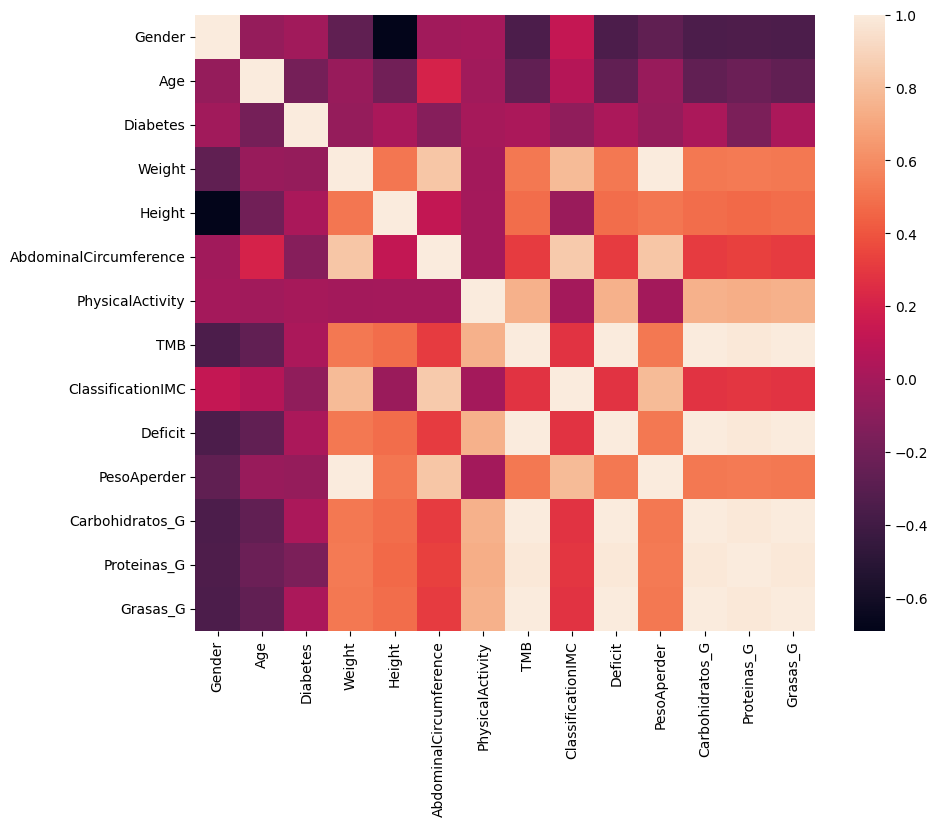

In [61]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(datos_pearson,ax=ax)

- Correlaciones con el Género: Parece que no hay correlaciones fuertes con el género, lo que sugiere que el género no influye significativamente en las otras medidas y características recogidas en este conjunto de datos.

- Edad: No se distinguen correlaciones fuertes con la edad, lo que indica que la edad no tiene una relación lineal fuerte con otras variables aquí presentes.
Diabetes: No hay bloques de color muy oscuro o claro asociados con la diabetes, lo que podría indicar que no hay una correlación lineal fuerte entre la diabetes y las demás variables en este conjunto de datos.

- Peso, Talla y Circunferencia Abdominal: Estas variables parecen tener algunas correlaciones entre sí, lo que es lógico ya que están relacionadas con las medidas físicas de un individuo.

- Actividad Física: No hay correlaciones destacadas con la actividad física, lo cual puede ser sorprendente, ya que se esperaría ver alguna relación con el peso o la composición corporal.

- TMB (Tasa Metabólica Basal): No se observa una correlación destacable con otras variables, lo que sugiere que la TMB es independiente de las características como el género, la edad o la presencia de diabetes.

- Clasificación IMC: Esta variable podría tener algunas correlaciones con el peso, la talla y la circunferencia abdominal, lo cual tiene sentido ya que el IMC se calcula a partir del peso y la altura.

- Déficit, Peso a Perder, y Macronutrientes (Carbohidratos, Proteínas, Grasas): Estas variables probablemente estén relacionadas con las recomendaciones dietéticas y el manejo del peso, y podrían mostrar correlaciones con medidas corporales como el peso y la circunferencia abdominal.

- Debido a la naturaleza visual de este gráfico y la falta de escalas o valores numéricos en la imagen, esta interpretación es bastante general. Una análisis más preciso requeriría acceso a los datos numéricos subyacentes para calcular correlaciones exactas.